In [0]:
%matplotlib inline
'asdfasdf'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model as linear_model

matplotlib.rcParams['figure.figsize'] = (14, 6)

### **4. Using atvi.zip, load the data using pandas and selecting the data for September 27, 2019 only:**

In [0]:
trades = pd.read_pickle('atvi.zip')
print(trades.head())
bar = trades['2019-09-27']
bar

                      open     high      low    close  volume
timestamp                                                    
2019-09-24 09:31:00  54.60  54.6000  54.5000  54.5000   83658
2019-09-24 09:32:00  54.29  54.2900  54.2900  54.2900   81132
2019-09-24 09:33:00  54.26  54.3645  54.2600  54.3645    7523
2019-09-24 09:34:00  54.28  54.3100  54.2101  54.2101   22693
2019-09-24 09:35:00  54.19  54.2700  54.1900  54.2600   24524


,open,high,low,close,volume
timestamp,,,,,
2019-09-27 09:31:00,54.2100,54.5000,54.210,54.4800,69539
2019-09-27 09:32:00,54.5000,54.5500,54.440,54.4800,10478
2019-09-27 09:33:00,54.3909,54.5272,54.327,54.4209,13645
2019-09-27 09:34:00,54.4100,54.4500,54.370,54.4250,9405
2019-09-27 09:35:00,54.4250,54.5000,54.370,54.4000,19844
...,...,...,...,...,...
2019-09-27 15:56:00,52.3800,52.3850,52.290,52.3100,59610
2019-09-27 15:57:00,52.3200,52.3300,52.280,52.2850,68304
2019-09-27 15:58:00,52.2800,52.3400,52.280,52.3350,66949


**a) calculate the difference between the Open and Close prices in each interval.**

In [0]:
price_diff = bar.close - bar.open
price_diff.head()

timestamp
2019-09-27 09:31:00    0.270
2019-09-27 09:32:00   -0.020
2019-09-27 09:33:00    0.030
2019-09-27 09:34:00    0.015
2019-09-27 09:35:00   -0.025
dtype: float64

**b) calculate the return between each Open and the previous Open. Hint: use the pandas pct_change() function.**

In [0]:
price_return = bar.open.pct_change()
price_return.head()

timestamp
2019-09-27 09:31:00         NaN
2019-09-27 09:32:00    0.005350
2019-09-27 09:33:00   -0.002002
2019-09-27 09:34:00    0.000351
2019-09-27 09:35:00    0.000276
Name: open, dtype: float64

**c) create a chart with four rows of plots:  stock price,  close - open, % change, volume per interval (as bar).**

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


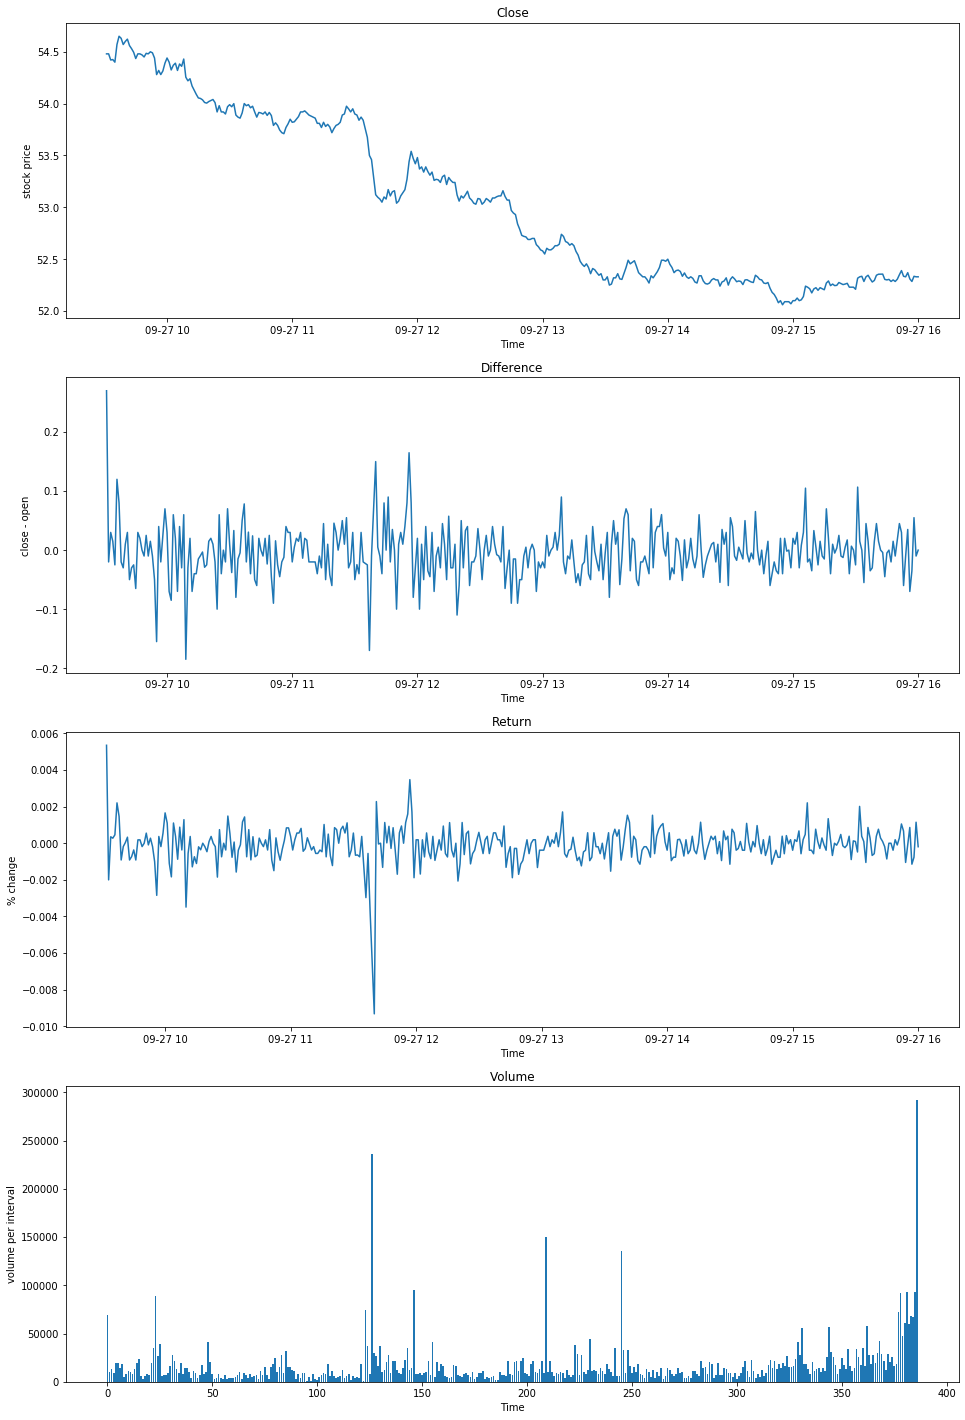

In [0]:
figure, plots = plt.subplots(4, 1, figsize=(16, 25))

plots[0].plot(bar['close'])
plots[0].set_title('Close')
plots[0].set_xlabel( 'Time' )
plots[0].set_ylabel( 'stock price' )


plots[1].plot(price_diff)
plots[1].set_title('Difference')
plots[1].set_xlabel( 'Time' )
plots[1].set_ylabel( 'close - open' )

plots[2].plot(price_return)
plots[2].set_title('Return')
plots[2].set_xlabel( 'Time' )
plots[2].set_ylabel( '% change' )

xes = np.arange(len(bar['volume']))
plots[3].bar(xes, bar['volume'])
plots[3].set_title('Volume')
plots[3].set_xlabel( 'Time' )
plots[3].set_ylabel( 'volume per interval' )

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt.show()

### **5. Using, atvi.zip, load the data using pandas:**

Reload the data

In [0]:
bars = pd.read_pickle('atvi.zip')

Calculate the accumlative trade volume and percent, create minute tags

In [0]:
totl_volume = bars.groupby( [ bars.index.date ] ).tail( 1 )[ 'volume' ]
bars[ 'accum_volume' ] = bars.groupby( [ bars.index.date ] ).cumsum()[ 'volume' ]
bars[ 'accum_pct' ] = bars.groupby( [ bars.index.date ] )[ 'accum_volume' ].transform( lambda x: x / x.iloc[ -1 ] )

start_of_day = (9 * 60) + 30
bars[ 'minute_bars' ] = (bars.index.hour * 60) + bars.index.minute - start_of_day

**a) using the example code from the class or your own method fit a function to obtain coefficients for a VWAP target function. Show your resulting coefficients.**

The example code from class:

In [0]:
adjusted_bars=bars['2019-09-24':'2019-09-27']
minute_bars = adjusted_bars[ 'minute_bars']
X = pd.DataFrame( { 'bin': minute_bars, 
                    'bin2' : minute_bars**2, 
                    'bin3' : minute_bars**3, 
                    'bin4' : minute_bars**4, 
                    'bin5' : minute_bars**5 } )
y = adjusted_bars[ 'accum_pct' ]

In [0]:
lm = linear_model.LinearRegression(fit_intercept = False)
model = lm.fit( X, y )
predictions = lm.predict( X )
# Rsquared
print(lm.score( X, y ))
print('The coefficients:\n',lm.coef_)

0.9908943338414771
The coefficients:
 [ 3.79237286e-03 -2.76102629e-05  1.73538740e-07 -5.00181495e-10
  5.49270809e-13]


**b) run the VWAP target function and plot your resulting cumulative volume function / target curve.**

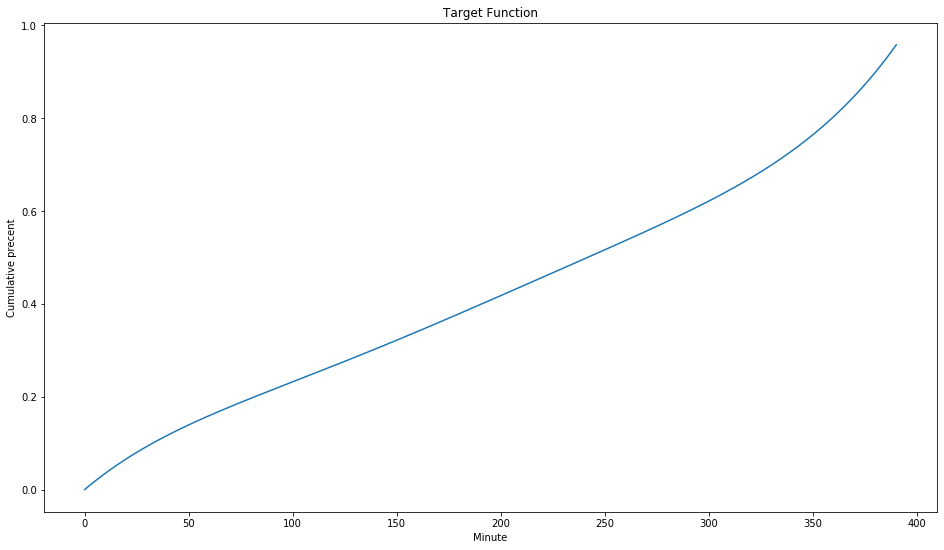

In [0]:
matplotlib.rcParams['figure.figsize'] = (16, 9)
def vwap_target( bar_num, coefs ):
    return ( coefs[ 0 ] * bar_num + 
             coefs[ 1 ] * bar_num**2 + 
             coefs[ 2 ] * bar_num**3 +
             coefs[ 3 ] * bar_num**4 +
             coefs[ 4 ] * bar_num**5 )
bins = np.linspace(0,390,391)
tgts = vwap_target( bins, lm.coef_ )
plt.plot(tgts)
plt.xlabel('Minute')
plt.ylabel('Cumulative precent')
plt.title('Target Function')
plt.show()

**c) plot the same VWAP target function as in b) above but also plot the "close" series from September 27, 2019 on the same chart.**

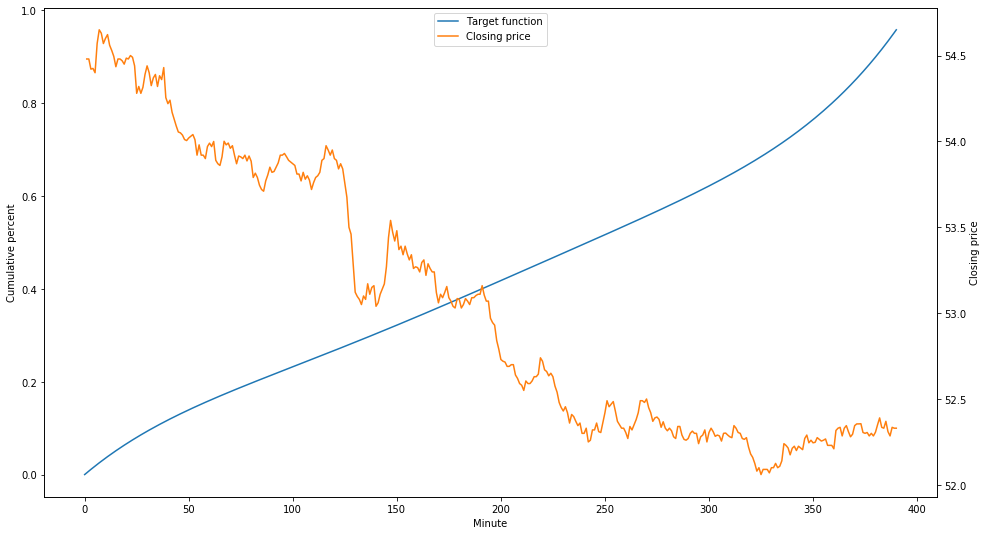

In [0]:
fig,ax=plt.subplots()
ax2=ax.twinx()
p1,=ax.plot(bins,tgts,color='C0')
ax.set_xlabel('Minute')
ax.set_ylabel('Cumulative percent')
p2,=ax2.plot(adjusted_bars['2019-09-27']['minute_bars'],adjusted_bars['2019-09-27']['close'],color='C1')
ax2.set_ylabel('Closing price')
plt.legend([p1,p2],['Target function','Closing price'],loc='upper center')
plt.show()